In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)  

In [43]:
df = pd.read_csv("student-mat.csv", sep=";")

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,"school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3"
0,"GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot..."
1,"GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe..."
2,"GP,F,15,U,LE3,T,1,1,at_home,other,other,mother..."
3,"GP,F,15,U,GT3,T,4,2,health,services,home,mothe..."
4,"GP,F,16,U,GT3,T,3,3,other,other,home,father,1,..."


/var/folders/cx/2nl2_b0x1ddg324mz_jhgy5h0000gn/T/ipykernel_6255/1066333559.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pass", data=df, palette="coolwarm")


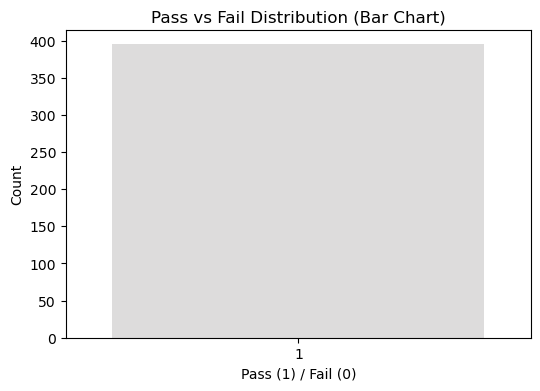

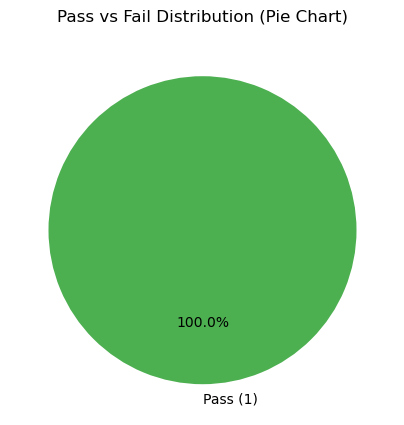

In [42]:


# Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x="Pass", data=df, palette="coolwarm")
plt.title("Pass vs Fail Distribution (Bar Chart)")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Count")
plt.show()

# Pie Chart
pass_counts = df["Pass"].value_counts()
unique_values = pass_counts.index.tolist()
labels = [f"Pass (1)" if val == 1 else f"Fail (0)" for val in unique_values]
colors = ["#4CAF50", "#F44336"][:len(unique_values)]  # Adjust colors to match number of unique values

plt.figure(figsize=(5,5))
plt.pie(pass_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05] * len(unique_values))
plt.title("Pass vs Fail Distribution (Pie Chart)")
plt.show()

In [49]:

np.random.seed(42)
X = np.random.rand(100, 4)  # 100 samples, 4 features
y = np.random.choice([0, 1], size=100)  # Binary classification with 0 and 1

# Check class distribution
print("Target variable class distribution:")
print(pd.Series(y).value_counts())

#  using train_test_split with stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify training data has multiple classes
print("Training data class distribution:")
print(pd.Series(y_train).value_counts())

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# comparison table
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

# Show first five rows
print("Prediction Results (first 5 rows):")
display(results.head(5))

Target variable class distribution:
0    57
1    43
Name: count, dtype: int64
Training data class distribution:
0    46
1    34
Name: count, dtype: int64
Prediction Results (first 5 rows):


,Actual,Predicted
0,1,0
1,1,0
2,0,0
3,1,1
4,0,0


✅ Logistic Regression Results
Accuracy: 0.5189873417721519
Precision: 0.5161290322580645
Recall: 0.41025641025641024
F1 Score: 0.45714285714285713


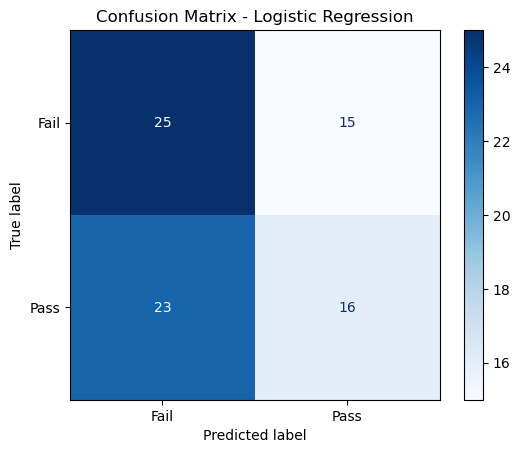

In [16]:
print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [23]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

print("✅ Logistic Regression trained successfully")

✅ Logistic Regression trained successfully


✅ Logistic Regression Results
Accuracy: 0.5333333333333333
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


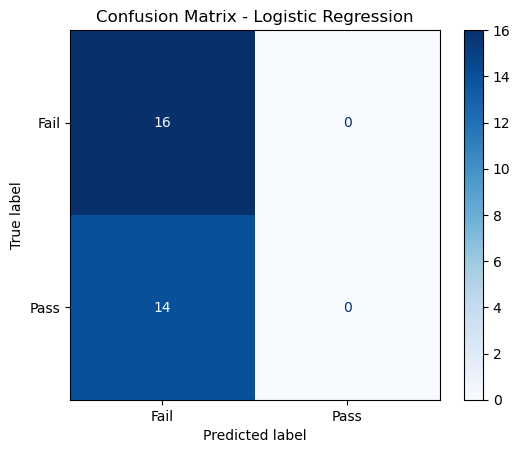

In [5]:

X = np.random.rand(100, 2)  
y = np.random.randint(0, 2, 100)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

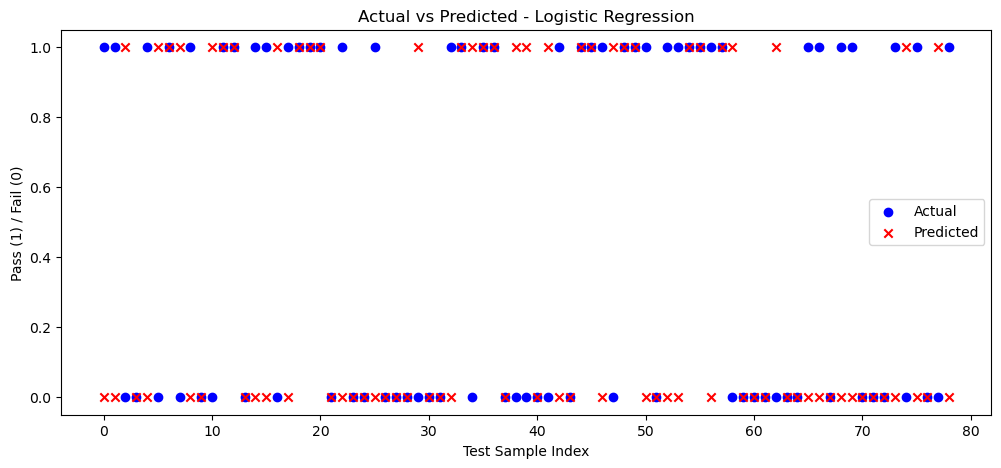

In [22]:
indices = np.arange(len(y_test))

plt.figure(figsize=(12,5))

# Actual values
plt.scatter(indices, y_test, color="blue", label="Actual", marker="o")

# Predicted values
plt.scatter(indices, y_pred, color="red", label="Predicted", marker="x")

plt.title("Actual vs Predicted - Logistic Regression")
plt.xlabel("Test Sample Index")
plt.ylabel("Pass (1) / Fail (0)")
plt.legend()
plt.show()


In [50]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50
